The strength of linear regression models lies in their ability to provide straightforward and interpretable solutions that not only predict future outcomes but also provide insight into the underlying processes that create these outcomes. One of the reasons why linear regression models are so commonplace is that by interpreting estimated coefficients, they can illuminate an underlying relationship. The process of interpreting the relationship between estimated coefficients and outcomes is called *inference*.

In this lesson, you'll learn to answer questions like the following:

* How much does an increase in an explanatory variable affect the explained variable?
* How can you single out the effect of a specific variable by isolating its effects from those of other variables that also affect the outcome?

The answers to these questions can drive a lot of business value. Think about a company that likes to measure the performance of its advertising expenditures. Are radio advertisements or Facebook ads more effective for attracting new customers? For $1,000 spent on TV ads, how many products does the company sell? And how can you distinguish whether the new customers are the result of TV ads or Google ads?

Before quantifying the relationship between the individual features and the target variable, you first need to determine whether that feature has a significant role in explaining the target. So, you'll start with a discussion of the statistical significance.

Here are the main topics that you'll learn about in this lesson:

* Statistical significance
* The t-test
* The t-value
* The p-value
* Inference and the relationship between estimated coefficients and the target
* Interpreting continuous and categorical variables
* Interpreting interaction terms
* Interpreting constants

You've covered some of these topics already, but now you'll revisit them in the context of regression problems.

## Statistical significance of individual coefficients

Estimating parameters in a linear regression model does not guarantee that the estimated coefficients are statistically significant!

When estimating a parameter, the ultimate objective is to find its true value in the population. More often than not, you'll need to work with a sample rather than the actual population, and you'll estimate the coefficients using a sample. For an individual coefficient to be *statistically significant*, it must have a relatively high value with respect to its standard deviation. In other words, it must help explain some information in the outcome.

To determine if an individual coefficient estimate is statistically different from zero, use *t-tests*. This is a way of quantifying a measure of *unique* variance in the outcome as a function of the parameter, after controlling for the variance explained by the other parameters.

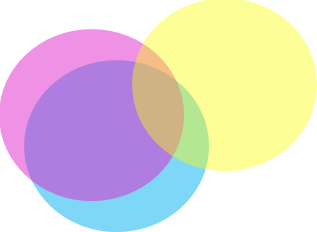

For example, in a linear regression with the yellow circle as the outcome, the total variance explained by the model is represented by the intersection of the yellow, blue, and pink feature circles. But the statistical test of the significance of the blue circle will be done on only the green area where blue and yellow overlap. It will ignore the area of shared overlap among blue, pink, and yellow. Similarly, the statistical test of the significance of the pink circle will be done on only the orange area where pink and yellow overlap.

A nonsignificant parameter does not contribute to the explanation of the information about the outcome variable. So it can be discarded with little to no decrease in the model's explanatory power. Moreover, when you're interpreting a model, you should treat statistically insignificant coefficients as if they are zero.

When you estimate a linear regression model using statsmodels, the `summary()` function returns t-statistics and associated p-values. Compared to t-values, p-values are easier to read. The p-value associated with a t-test quantifies the likelihood that the estimated coefficient is actually equal to zero in the real population. The lower the p-value, the more significant the coefficient is. As a general rule of thumb, when the p-value of a coefficient is less than or equal to `0.1`, you can say that the coefficient is statistically significant. However, it's admirable to have a p-value that is less than or equal to `0.05`.


## The new medical costs model

Now, use the *Medical costs* dataset to learn how to interpret the estimated coefficients in a linear regression model. In the code below, you'll load the *Medical costs* dataset and build a new regression model that includes continuous variables as well as the categorical ones. In the dataset, there are two continuous variables: `age` and `BMI` (body mass index). In this new model, you'll add them alongside the `is_male` and `is_smoker` dummies as explanatory variables.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sqlalchemy import create_engine, text

# Display preferences
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'medicalcosts'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

# insurance_df = pd.read_sql_query('select * from medicalcosts',con=engine)
with engine.begin() as conn:
    query = text("""SELECT * FROM medicalcosts""")
    insurance_df = pd.read_sql_query(query, conn)

# No need for an open connection, because you're only doing a single query
engine.dispose()


insurance_df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.900
1,18,male,33.770,1,no,southeast,1725.550
2,28,male,33.000,3,no,southeast,4449.460
3,33,male,22.705,0,no,northwest,21984.500
4,32,male,28.880,0,no,northwest,3866.860
5,31,female,25.740,0,no,southeast,3756.620
6,46,female,33.440,1,no,southeast,8240.590
7,37,female,27.740,3,no,northwest,7281.510
8,37,male,29.830,2,no,northeast,6406.410
9,60,female,25.840,0,no,northwest,28923.100


In [3]:
insurance_df["is_male"] = pd.get_dummies(insurance_df.sex, drop_first=True)
insurance_df["is_smoker"] = pd.get_dummies(insurance_df.smoker, drop_first=True)

In [4]:
# `Y` is the target variable
Y = insurance_df['charges']

# `X` is the feature set
X = insurance_df[['is_male','is_smoker', 'age', 'bmi']]

# Add a constant to the model because it's best practice
# to do so every time!
X = sm.add_constant(X)

# Fit an OLS model using statsmodels
results = sm.OLS(Y, X).fit()

# Print the summary results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     986.5
Date:                Wed, 08 Nov 2023   Prob (F-statistic):               0.00
Time:                        02:28:57   Log-Likelihood:                -13557.
No. Observations:                1338   AIC:                         2.712e+04
Df Residuals:                    1333   BIC:                         2.715e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.163e+04    947.267    -12.281      0.0

The estimated model is:

$$ charges = -11633.50 - 109.04is\_male + 23833.87is\_smoker + 259.45age + 323.05bmi \qquad(eq.1)$$

The `is_male` and `is_smoker` variables are dummies, but the `age` and `BMI` variables are continuous. Interpreting dummies is slightly different than interpreting continuous variables. In this lesson, you'll learn about them separately. But before moving forward, you need to understand how to isolate the mutual effects of multiple variables on the target.

## OLS regression as a controlled experiment

A *controlled experiment* is a scientific experiment type where the effect of a single factor is measured by controlling other factors that also affect the outcome. For example, if you want to measure the effect of light on the growth of a specific plant, then you need to set up two environments where every factor is the same, except for the amount of light. So factors like humidity, soil, and so forth would be the same in both environments.

You can think of estimated linear regression models as a controlled experiment. When you estimate the coefficients of a model using OLS, you actually get coefficient estimates that are isolated from each other. That is to say, the coefficient of a feature measures the effect of that variable on the outcome variable by holding all other variables constant at their means. So you can interpret an estimated coefficient as the measure of the relationship between that feature and the target, after stripping out the effects of all other features.

## Interpreting the dummy variables

Consider the coefficients of the dummy variables in equation 1. The coefficient of `is_male` is `-109.04`, and the coefficient of `is_smoker` is `23833.87`. Moreover, you can see that the p-value of `is_smoker` is very close to zero, whereas the p-value of `is_male` is `0.745`. This implies that the coefficient of `is_male` is effectively zero from a statistical point of view. It's not significant, and you can say that there appears to be no relationship between medical costs and biological sex.

This is an okay hunch, but it requires further confirmation. It's possible that the model equation may play some role in this conclusion. You'll see later in this lesson that by including an additional variable in the model, the coefficient of `is_male` can be made statistically significant.

On the other hand, smoking is a significant factor in the medical costs charged. According to the estimation, the medical costs of people who smoke are, on average, $23,833.87 more than those who don't smoke. Recall that when you include dummies in a model, you always hold one group out. In this example, the holdout group is the nonsmokers, and you need to read the coefficient of the `is_smoker` dummy variable relative to this holdout group.

## Interpreting continuous variables

Now, interpret the coefficients of the continuous variables in equation 1. First, both the `age` and `BMI` variables are statistically significant; the p-values are very close to zero. The coefficient of `age` is `259.45`. As a person's age increases by one year, their costs increase by \$259.40 on average. Similarly, as BMI increases by one point, medical costs increase by \$323.05 on average.

**Note:** Sometimes, transforming the target and features can lead to a clearer interpretation. For example, imagine that you take the logarithms of a target and a feature, and then estimate the model. In that scenario, you could interpret the "coefficient" of that feature as follows: a percentage increase in the value of the original (not log-transformed) feature results in the "coefficient" percentage change in the original (not log-transformed) target. If you're wondering why this is the case, you can read this [StackOverflow question](https://stats.stackexchange.com/questions/244199/why-is-it-that-natural-log-changes-are-percentage-changes-what-is-about-logs-th).



## Interpreting the interaction terms

So far, you've interpreted categorical and continuous variables one at a time. But sometimes, you'll need to model *interactions* in order to best explain outcomes. By putting interaction variables in a linear regression model, you can capture nonlinear relationships between the target and the features. For example, from equation 1, you know the difference in average costs between smokers and nonsmokers. But if you believe that the costs for smokers would increase as the BMI of a person increases (because the probability of having a heart attack increases) more than the nonsmokers, you need to add the interaction of `BMI` and the `is_smoker` dummy to the model.

Mathematically, you capture the interaction of two variables by multiplying them. Now, create an interaction variable and add it to your model:

In [5]:
# `Y` is the target variable
Y = insurance_df['charges']

# This is the interaction between BMI and smoking
insurance_df["bmi_is_smoker"] = insurance_df.bmi * insurance_df.is_smoker

# `X` is the feature set
X = insurance_df[['is_male','is_smoker', 'age', 'bmi', "bmi_is_smoker"]]

# Add a constant to the model because it's best practice
# to do so every time
X = sm.add_constant(X)

# Fit an OLS model using statsmodels
results = sm.OLS(Y, X).fit()

# Print the summary results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     1365.
Date:                Wed, 08 Nov 2023   Prob (F-statistic):               0.00
Time:                        02:56:56   Log-Likelihood:                -13265.
No. Observations:                1338   AIC:                         2.654e+04
Df Residuals:                    1332   BIC:                         2.657e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2071.0750    840.644     -2.464

The estimated model is as follows:

$$ charges = -2071.07 - 473.49is\_male - 20190is\_smoker + 266.37age + 7.96bmi + 1435.60bmi\_is\_smoker \qquad(eq.2)$$

First, notice that all of the coefficients have changed with respect to the previous model. This is because every time that you add or drop a variable, the model specification changes. This results in different point estimates for the coefficients. The same is also true for the statistical significance of the coefficients. For example, the coefficient of the `is_male` dummy now turns out to be statistically significant.

Now that you've added the interaction of `BMI` and `is_smoker` to the model, `BMI` is no longer statistically significant. This is probably because BMI mainly affects medical charges when the `is_smoker` variable is `True`. As you can see, the coefficient of the interaction variable is statistically significant.

According to these results, a one-point increase in BMI results in a $1,435.60 greater increase for smokers than for nonsmokers. However, you should read this result with caution. On its face, a \\$1,435.60 increase sounds like a lot for a single-point increase in BMI. That's probably because of the fact that your target variable (`charges`) is very skewed. So, linear regression comes up with estimates that measure the relationship on average.

You can illustrate the effect of interaction in a graph as follows:

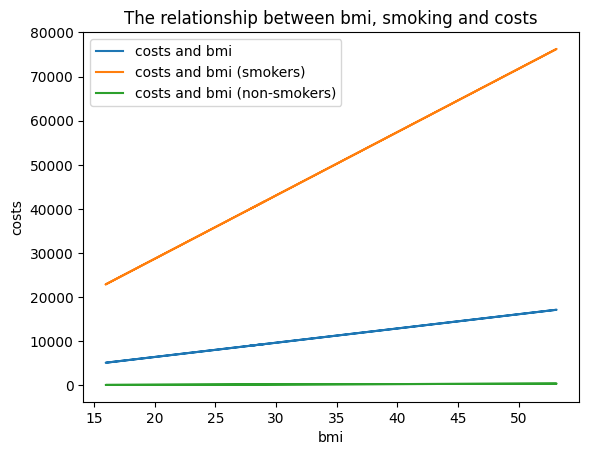

In [8]:
costs_bmi = insurance_df.bmi * 323.0511
costs_bmi_smokers = insurance_df.bmi * 1435.6081
costs_bmi_non_smokers = insurance_df.bmi * 7.9686


plt.plot(insurance_df.bmi, costs_bmi)
plt.plot(insurance_df.bmi, costs_bmi_smokers)
plt.plot(insurance_df.bmi, costs_bmi_non_smokers)
plt.legend(["costs and bmi", "costs and bmi (smokers)", "costs and bmi (non-smokers)"])
plt.xlabel("bmi")
plt.ylabel("costs")
plt.title("The relationship between bmi, smoking and costs")

plt.show()

The <font color=blue>blue line</font> is the relationship that you estimated in equation 1 between `BMI` and `charges`. Because the interaction of BMI and smoking is not included in this model, the estimated value represents an averaged figure for BMI. The <font color=green>green line</font> is the relationship that you estimated in equation 2 between the charges and BMI for nonsmokers, and the <font color=orange>orange line</font> represents the relationship between charges and BMI for smokers. As you can see, the increase in charges with an increase in BMI is higher for smokers than nonsmokers. Because of the interaction term in equation 2, you can now distinguish the effects of an increase in BMI on charges between smokers and nonsmokers. Notice that the blue line lies between the green and the orange lines because it measures the averaged effect of BMI on charges both for smokers and nonsmokers.

## Interpreting the constant

Constants in linear regression models correspond to the outcome value that is expected to happen when all of the explanatory variables take a zero value. In a simple linear regression setting (when there is only a single explanatory variable), constants correspond to the point where the fitted curve crosses the y-axis.

Although it's easy to visualize the constant term in simple linear regression settings, it gets harder to grasp what a constant term means if there are many features included in the model. For example, if a dummy variable is included in a model, then one category should be excluded from the model, as explained before. In this case, the constant term also includes information regarding the holdout category. Hence, a lot of factors may be captured by the constant.

The safest way to think about the constant term is to think of it as the bias. Remember from the previous lesson that the constant terms make the residuals zero on average. In this sense, the constant takes the bias from residuals to itself. This is why the constant is also called *bias*.
